Analysis of Human Cell Atlas of Fetal Gene Expression
=====================================================

In [1]:
import scanpy as sc
import singleCellHaystack as hs

sc.settings.set_figure_params(dpi=150, facecolor='white')

Here we show how singleCellHaystack can handle very large datasets. For this we use the Human Cell Atlas of Fetal Gene Expression dataset with ~4 million cells.

# Load data

Reading the loom file is very slow and memory costly. It is better to do this independently and export the data in h5ad format.

In [2]:
%%time
#adata = sc.read_loom("data/GSE156793_S3_gene_count.loom")
adata = sc.read_h5ad("output/adata.h5ad")
adata

CPU times: user 17.7 s, sys: 16.3 s, total: 34.1 s
Wall time: 36.6 s


AnnData object with n_obs × n_vars = 4062980 × 63561
    obs: 'All_reads', 'Assay', 'Batch', 'Development_day', 'Exon_reads', 'Experiment_batch', 'Fetus_id', 'Intron_reads', 'Main_cluster_name', 'Main_cluster_umap_1', 'Main_cluster_umap_2', 'Organ', 'Organ_cell_lineage', 'RT_group', 'Sex', 'Size_Factor', 'batch', 'obs_names', 'sample'
    var: 'exon_intron', 'gene_id', 'gene_short_name', 'gene_type', 'index', 'var_names'
    uns: 'Main_cluster_name_colors'
    obsm: 'X_umap'

# Filter genes

We remove genes expressed in less than 100 cells.

In [3]:
sc.pp.filter_genes(adata, min_cells=100)
adata 

AnnData object with n_obs × n_vars = 4062980 × 35686
    obs: 'All_reads', 'Assay', 'Batch', 'Development_day', 'Exon_reads', 'Experiment_batch', 'Fetus_id', 'Intron_reads', 'Main_cluster_name', 'Main_cluster_umap_1', 'Main_cluster_umap_2', 'Organ', 'Organ_cell_lineage', 'RT_group', 'Sex', 'Size_Factor', 'batch', 'obs_names', 'sample'
    var: 'exon_intron', 'gene_id', 'gene_short_name', 'gene_type', 'index', 'var_names', 'n_cells'
    uns: 'Main_cluster_name_colors'
    obsm: 'X_umap'

# Preprocess

In [4]:
%%time
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

CPU times: user 33.5 s, sys: 2.81 s, total: 36.3 s
Wall time: 36.3 s


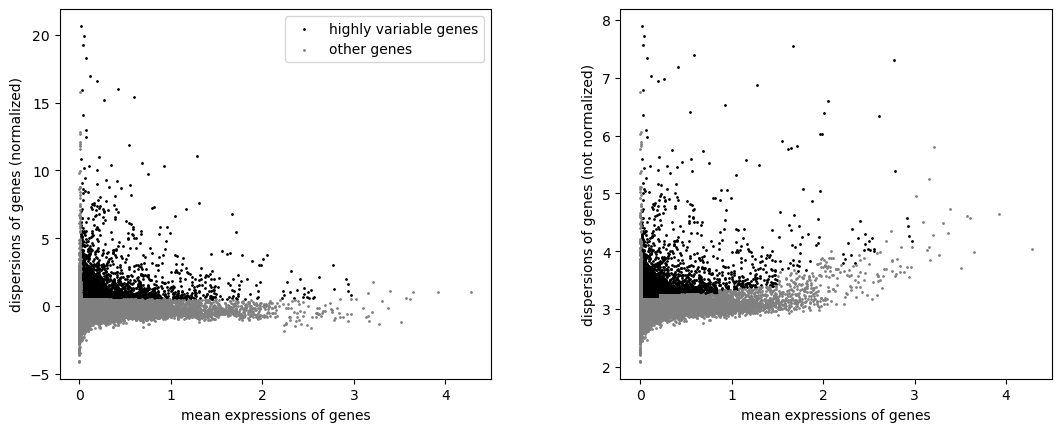

CPU times: user 47 s, sys: 13.4 s, total: 1min
Wall time: 50.8 s


In [5]:
%%time
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [6]:
adata.raw = adata

In [7]:
adata = adata[:, adata.var.highly_variable]

/Users/diez/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


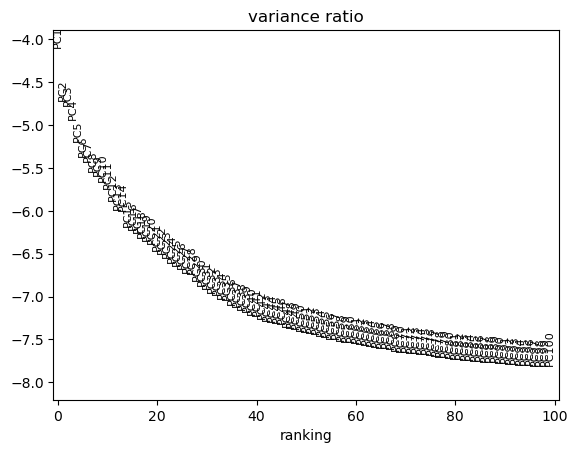

CPU times: user 9h 24min 44s, sys: 15min 6s, total: 9h 39min 50s
Wall time: 25min 50s


In [8]:
%%time
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(adata, n_pcs=100, log=True)

/Users/diez/miniconda3/envs/scanpy/lib/python3.10/site-packages/umap/spectral.py:342: UserWarning: Exited at iteration 20 with accuracies 
[0.01355775 0.01357453 0.01446526]
not reaching the requested tolerance 1e-08.
Use iteration 21 instead with accuracy 
0.013865846475387812.

  eigenvalues, eigenvectors = scipy.sparse.linalg.lobpcg(
/Users/diez/miniconda3/envs/scanpy/lib/python3.10/site-packages/umap/spectral.py:342: UserWarning: Exited postprocessing with accuracies 
[0.01355775 0.01357453 0.01446526]
not reaching the requested tolerance 1e-08.
  eigenvalues, eigenvectors = scipy.sparse.linalg.lobpcg(
/Users/diez/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


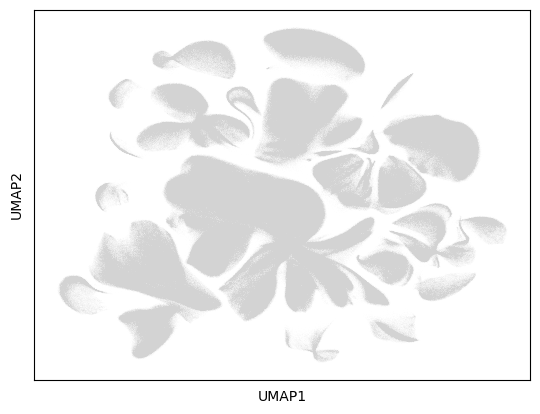

CPU times: user 2h 39min 8s, sys: 5min 54s, total: 2h 45min 2s
Wall time: 1h 45min 3s


In [9]:
%%time
sc.pp.neighbors(adata, n_pcs=50)
sc.tl.umap(adata)
sc.pl.umap(adata)

/Users/diez/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


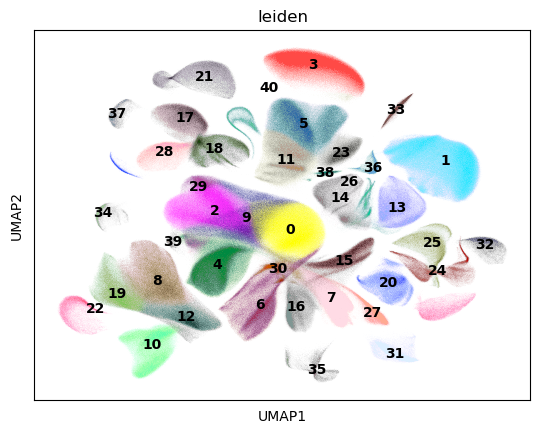

CPU times: user 6h 49min 54s, sys: 7min 32s, total: 6h 57min 27s
Wall time: 6h 56min 7s


In [10]:
%%time
sc.tl.leiden(adata)
sc.pl.umap(adata, color="leiden", legend_loc="on data")

We use the raw attribute so that we can test all genes.

In [11]:
adata_raw = adata.raw.to_adata()
adata_raw

AnnData object with n_obs × n_vars = 4062980 × 35686
    obs: 'All_reads', 'Assay', 'Batch', 'Development_day', 'Exon_reads', 'Experiment_batch', 'Fetus_id', 'Intron_reads', 'Main_cluster_name', 'Main_cluster_umap_1', 'Main_cluster_umap_2', 'Organ', 'Organ_cell_lineage', 'RT_group', 'Sex', 'Size_Factor', 'batch', 'obs_names', 'sample', 'leiden'
    var: 'exon_intron', 'gene_id', 'gene_short_name', 'gene_type', 'index', 'var_names', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Main_cluster_name_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_umap', 'X_pca'
    obsp: 'distances', 'connectivities'

We set the gene symbols as index, so that they will be included in the haystack results.

In [12]:
adata_raw.var["index"]=list(map(str, adata_raw.var.gene_short_name.to_list()))
adata_raw.var=adata_raw.var.set_index("index")
adata_raw.var

,exon_intron,gene_id,gene_short_name,gene_type,var_names,n_cells,highly_variable,means,dispersions,dispersions_norm
index,,,,,,,,,,
WASH7P,exon,ENSG00000227232.4,WASH7P,pseudogene,ENSG00000227232.4,1719,False,0.005195,3.152367,0.433195
RP11-34P13.7,exon,ENSG00000238009.2,RP11-34P13.7,lincRNA,ENSG00000238009.2,2492,False,0.005935,2.904171,-0.624707
CICP27,exon,ENSG00000233750.3,CICP27,pseudogene,ENSG00000233750.3,476,False,0.001367,2.950321,-0.427997
AL627309.1,exon,ENSG00000237683.5,AL627309.1,protein_coding,ENSG00000237683.5,4140,True,0.016144,3.347481,1.264840
RP11-34P13.15,exon,ENSG00000268903.1,RP11-34P13.15,pseudogene,ENSG00000268903.1,197,False,0.000877,3.482546,1.840537
...,...,...,...,...,...,...,...,...,...,...
RNA28S5,exon,ENSG00000266658.2,RNA28S5,rRNA,ENSG00000266658.2,902875,False,1.680279,3.473712,0.144642
AL592170.1,exon,ENSG00000233094.2,AL592170.1,protein_coding,ENSG00000233094.2,131,False,0.000289,2.926089,-0.531284
ZNF84,exon,ENSG00000218497.3,ZNF84,protein_coding,ENSG00000218497.3,147,False,0.000392,3.225180,0.743549


# Run haystack

In [13]:
%%time
res = hs.haystack(adata_raw, "pca")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 35686 features ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35686/35686 [41:49<00:00, 14.22it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:26:16<00:00, 51.77s/it]


> calculating P values ...
> done.
CPU times: user 15h 7min 37s, sys: 1d 2h 37min 17s, total: 1d 17h 44min 55s
Wall time: 3h 38min 14s


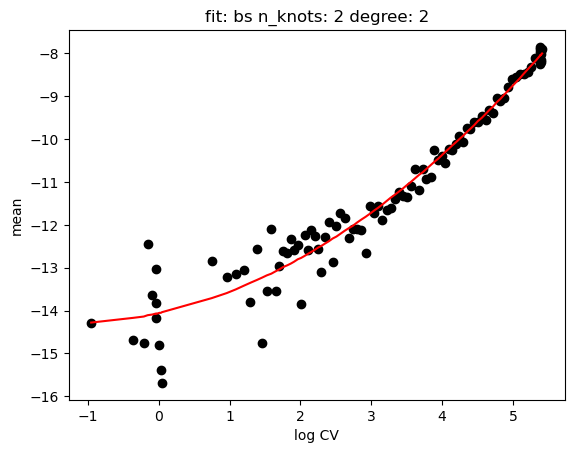

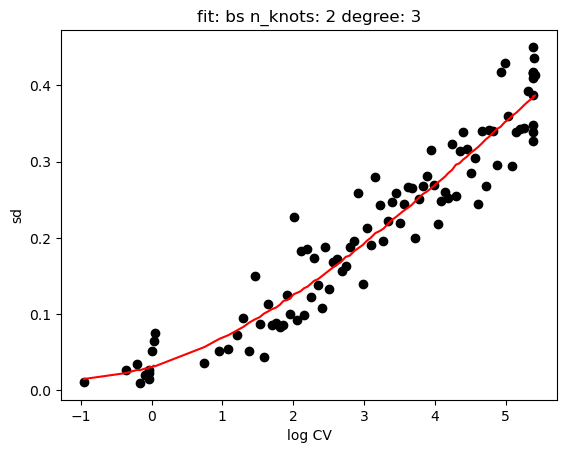

In [14]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

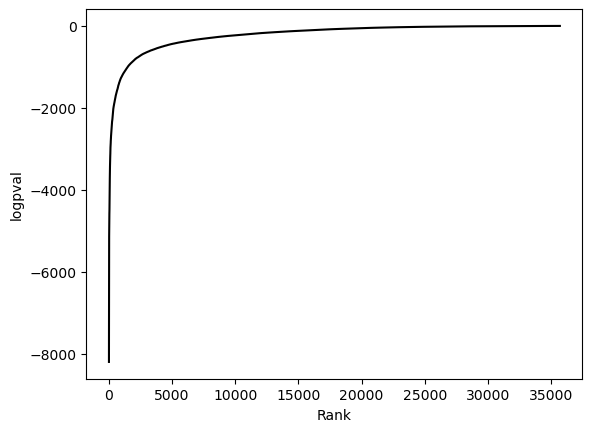

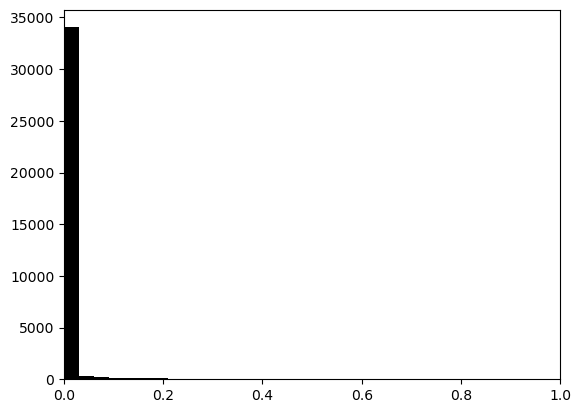

In [15]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

In [16]:
sum = res["results"]
sum.head(10)

,gene,KLD,pval,pval_adj,logpval,logpval_adj
19880,MALAT1,0.000011,0.0,0.0,-8204.908347,-8200.355849
16291,PTPRD,0.000123,0.0,0.0,-8133.804309,-8129.251811
13709,AUTS2,0.000050,0.0,0.0,-7864.983675,-7860.431177
3996,NRXN1,0.000099,0.0,0.0,-7552.591193,-7548.038695
6733,ROBO2,0.000128,0.0,0.0,-7056.877873,-7052.325375
12169,BAI3,0.000103,0.0,0.0,-6534.973548,-6530.421050
8452,LPHN3,0.000097,0.0,0.0,-5932.948257,-5928.395759
6943,LSAMP,0.000162,0.0,0.0,-5924.083997,-5919.531500
29615,DLGAP1,0.000110,0.0,0.0,-5834.298885,-5829.746387
22249,ANKS1B,0.000108,0.0,0.0,-5747.931987,-5743.379489


In [17]:
genes = sum.head(11).gene.tolist()
genes

['MALAT1',
 'PTPRD',
 'AUTS2',
 'NRXN1',
 'ROBO2',
 'BAI3',
 'LPHN3',
 'LSAMP',
 'DLGAP1',
 'ANKS1B',
 'SYT1']

/Users/diez/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


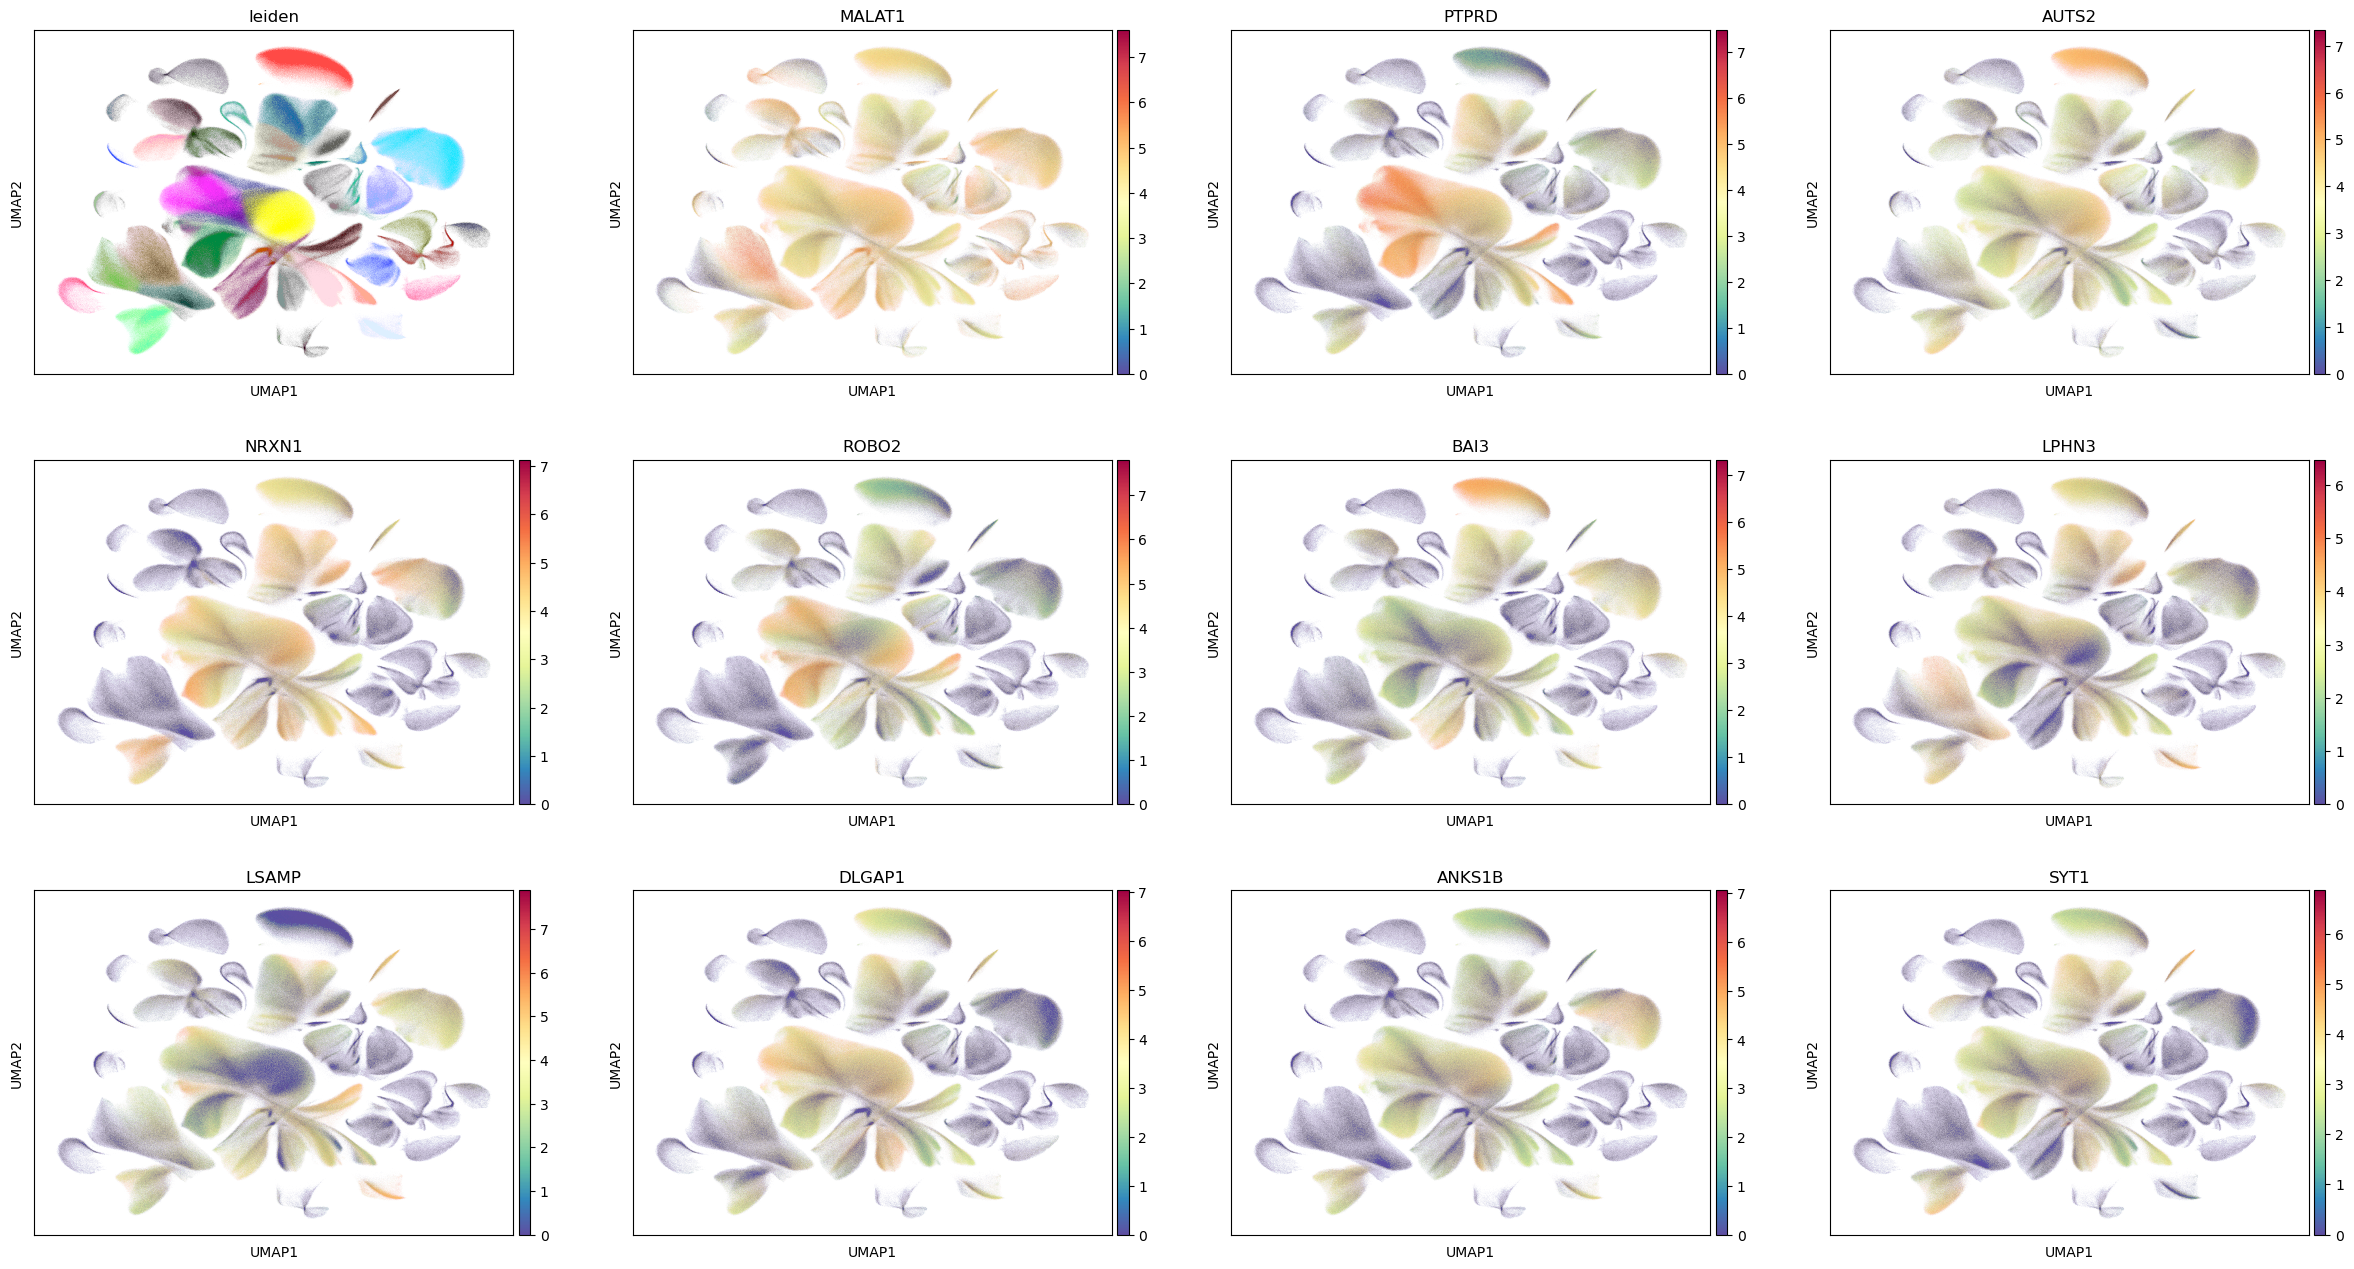

In [18]:
sc.pl.umap(adata_raw, color=["leiden"] + genes, color_map="Spectral_r", legend_loc=None, sort_order=False)